In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud #This library is used for the visual representation of the most frequent words in text.
data = pd.read_csv(r"C:\Users\noufi\Downloads\netflix1.csv")
data.head(10) # load first 10 datas


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


In [3]:
data.shape

(8790, 10)

In [4]:
data.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
data = data.drop_duplicates()


In [6]:
print(data.isnull().sum()) #checking for missing values

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [7]:
data.drop_duplicates(inplace=True) #drop duplicates if any
data.dropna(subset=['director','type' ,'country'], inplace=True)
data['date_added'] = pd.to_datetime(data['date_added']) #converts the text(string) format to datetime format
print(data.dtypes)
data.shape


show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


(8790, 10)

Text(0.5, 0.98, 'TotalContentonNetflix')

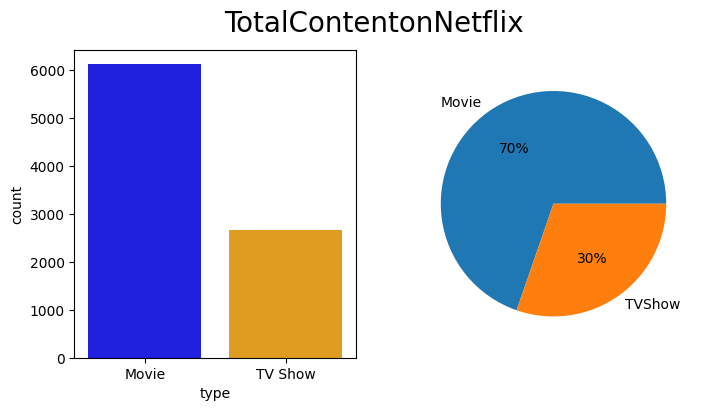

In [8]:
#Content distribution on Netflix
freq=data['type'].value_counts()
fig,axes=plt.subplots(1,2,figsize=(8,4))
sns.countplot(data=data, x='type', hue='type', ax=axes[0],
              palette=['blue', 'orange'], legend=False)
plt.pie(freq,labels=['Movie','TVShow'],autopct='%.0f%%')
plt.suptitle('TotalContentonNetflix',fontsize=20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


Text(0.5, 0.98, 'Rating on Netflix')

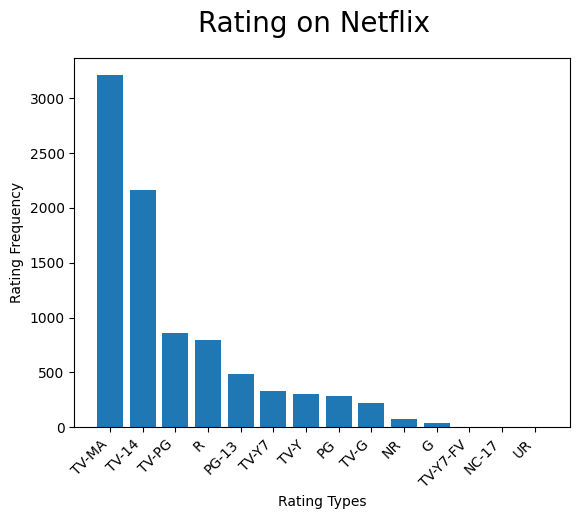

In [9]:
# rating frequency of movies and TV Shows on Netflix
data.info()
data['rating'].value_counts()
ratings=data['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)
plt.bar(ratings['rating'], ratings['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.suptitle('Rating on Netflix', fontsize=20)

Text(0.5, 0.98, 'Rating on Netflix')

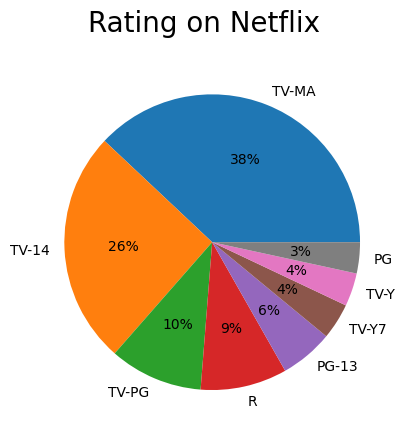

In [10]:
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8],
 autopct='%.0f%%')
plt.suptitle('Rating on Netflix', fontsize=20)

In [11]:
data['date_added']=pd.to_datetime(data['date_added']) #converts the text(string) format to datetime format
data.describe()


,date_added,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


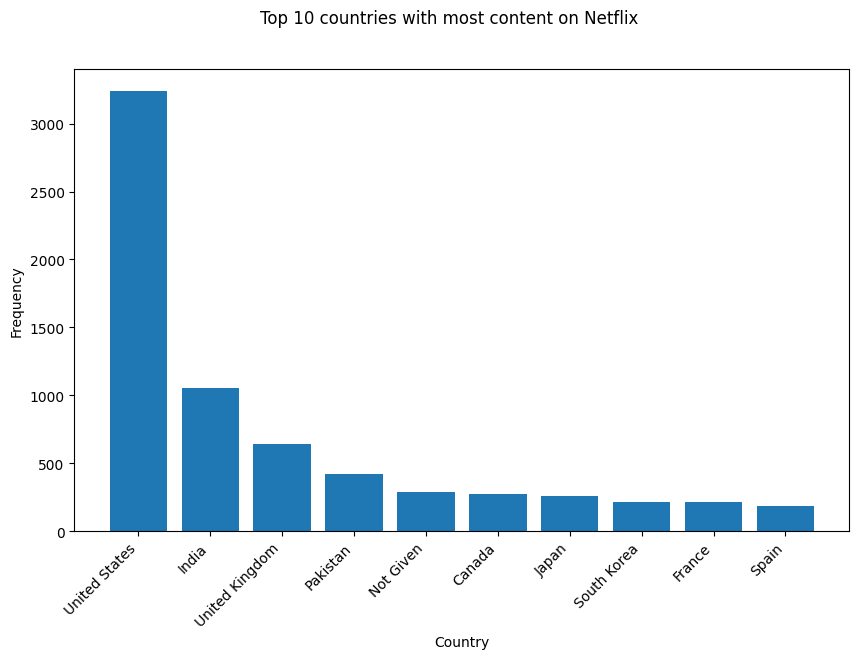

In [12]:
data['country'].value_counts()
top_ten_countries=data['country'].value_counts().reset_index().sort_values(by='count',ascending=False)[:10]
plt.figure(figsize=(10,6))
plt.bar(top_ten_countries['country'],
top_ten_countries['count'])
plt.xticks(rotation=45,ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 countries with most content on Netflix")
plt.show()


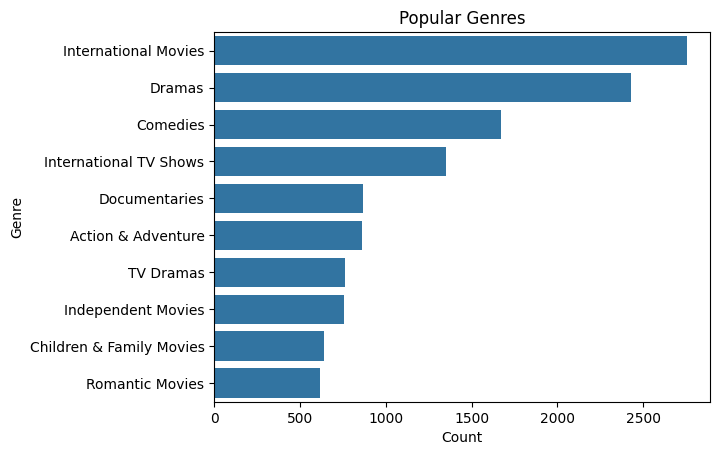

In [13]:
data['genres'] = data['listed_in'].apply(lambda x: x.split(', '))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Popular Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show() 

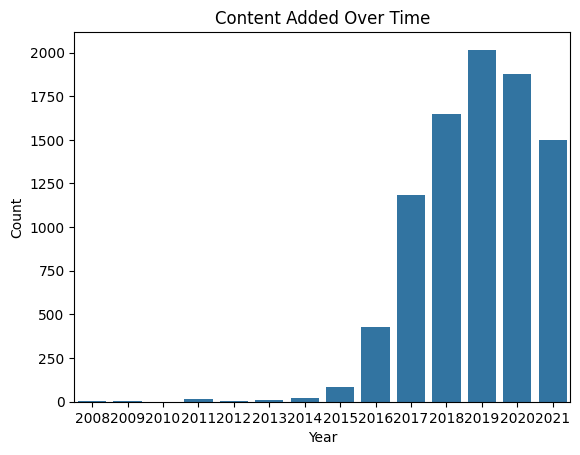

In [14]:
data['year_added'] = data['date_added'].dt.year #extracts the year from each 'date_added' and stores it in a new column 'year_added'
data['month_added'] = data['date_added'].dt.month #extracts the month from each 'date_added' and stores it in a new column 'month_added'

sns.countplot(x='year_added', data=data)
plt.title("Content Added Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


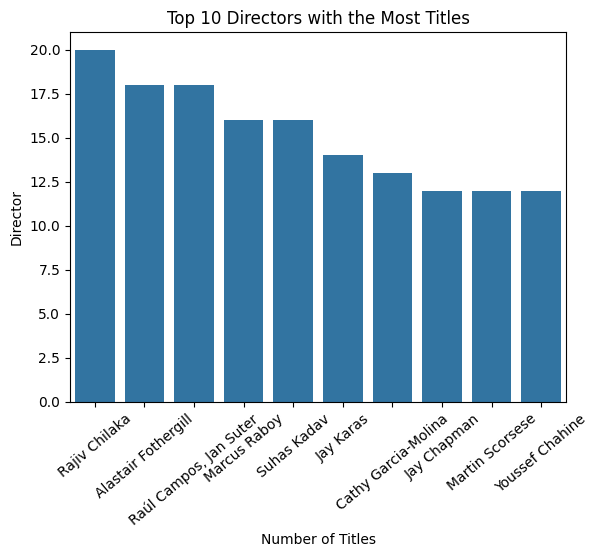

In [ ]:
#top_directors = data['director'].value_counts().head(10)
top_directors = data['director'].value_counts().iloc[1:11] # to avoid the topmost like outlier
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.title("Top 10 Directors with the Most Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.xticks(rotation=40)
plt.show()


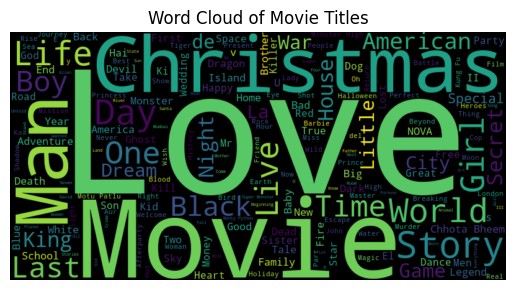

In [16]:
#data.head(25)
#example to show the usage of wordcloud
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Movie Titles")
plt.show()


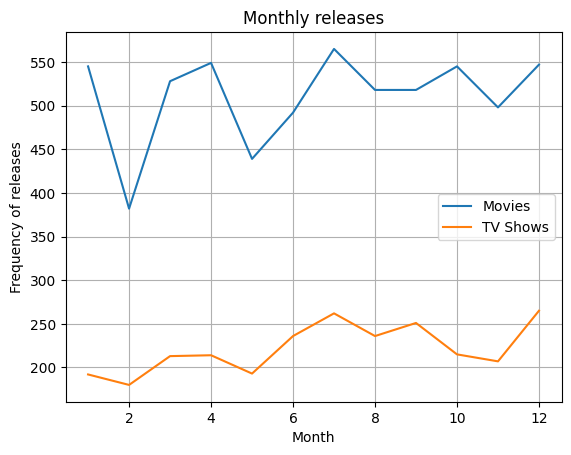

In [17]:
monthly_movie = data[data['type']=='Movie']['month_added'].value_counts().sort_index()
monthly_show = data[data['type']=='TV Show']['month_added'].value_counts().sort_index()

plt.plot(monthly_movie.index, monthly_movie.values, label="Movies")
plt.plot(monthly_show.index, monthly_show.values, label="TV Shows")
plt.title("Monthly releases")
plt.xlabel("Month")
plt.ylabel("Frequency of releases")
plt.legend()
plt.grid(True)
plt.show()



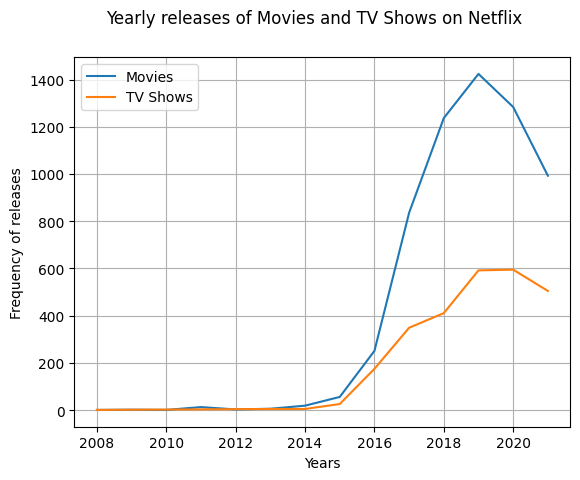

In [18]:
#data.head()
yearly_movie_releases = data[data['type']=='Movie']['year_added'].value_counts().sort_index()
yearly_series_releases=data[data['type']=='TV Show']['year_added'].value_counts().sort_index()
plt.plot(yearly_movie_releases.index,
 yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index,
 yearly_series_releases.values, label='TV Shows')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()

In [19]:
data.head()
print(data['type'].unique())


['Movie' 'TV Show']


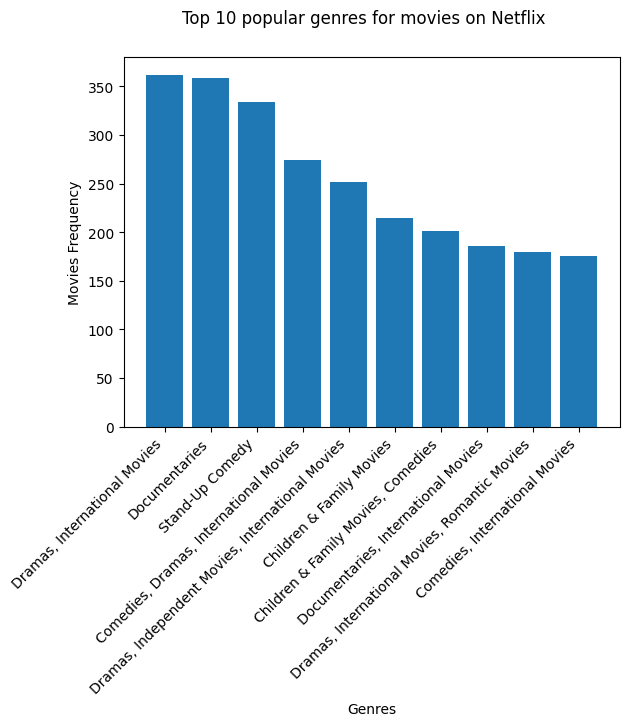

In [20]:
popular_movie_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]
plt.bar(popular_movie_genre.index, popular_movie_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()


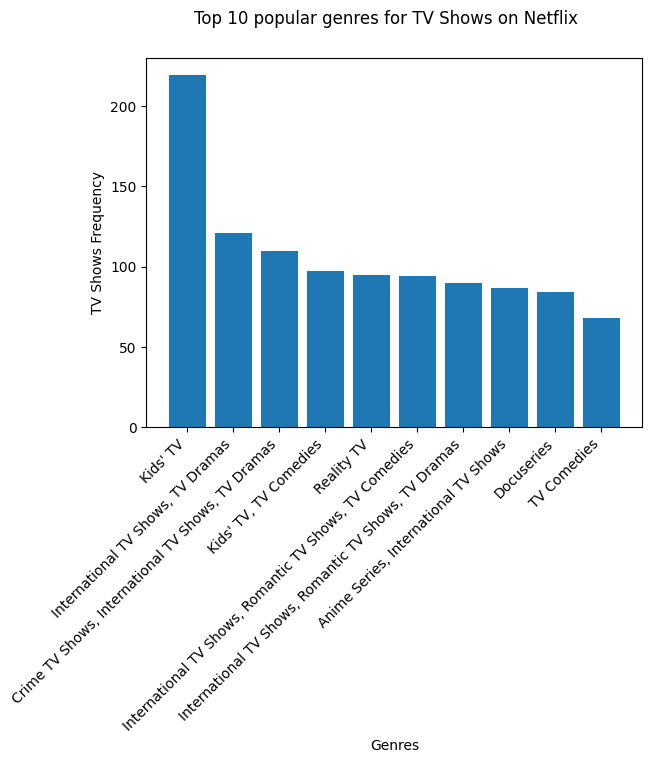

In [21]:
plt.bar(popular_series_genre.index,popular_series_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV Shows Frequency")
plt.suptitle("Top 10 popular genres for TV Shows on Netflix")
plt.show()


Text(0.5, 1.0, 'Top 15 Most Frequent Netflix Directors (Excluding Top 1)')

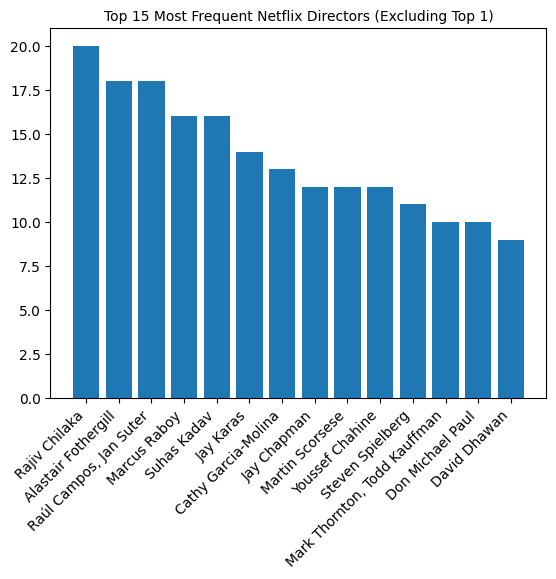

In [22]:
directors=data['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]
plt.bar(directors['director'], directors['count'])
plt.xticks(rotation=45, ha='right')
plt.title("Top 15 Most Frequent Netflix Directors (Excluding Top 1)", fontsize=10)


In [23]:
conclusions: 
-Movies dominate over TV Shows in Netflix
-United states has the most content on Netflix
-Popular genres in Netflix are International movies and dramas
-WordCloud library is used for quick virtual represention of most frequent words
-Dramas and International movies are the most popular Genres for Movies on Netflix
-Kid's TV is the most popular Genres for TV Shows on Netflix
-Director Rajiv chilaka is first among the top 15 netflix directors.
-number of movies added annually to Netflix peaked in 2019, followed by a slight dip in 2020


SyntaxError: unterminated string literal (detected at line 7) (2778969912.py, line 7)